<a href="https://colab.research.google.com/github/abdulwasaeee/Pytorch-Bootcamp/blob/main/pytorch-custom-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import torch
from torch import nn

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
import requests
import zipfile
from pathlib import Path

In [2]:
datapath= Path('data/')
imgpath=  datapath / "pss"

In [5]:
if imgpath.is_dir():
  print("path exists")
else:
  print("creating path....")
  imgpath.mkdir(parents=True, exist_ok=True)


path exists


In [6]:
with open(datapath / "pss.zip", "wb") as f:
  requests=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downloading data...")
  f.write(requests.content)

downloading data...


In [7]:
with zipfile.ZipFile(datapath / "pss.zip", "r") as zip:
  zip.extractall(imgpath)

In [18]:
import os
def walk(dir):
  for dirpath, dirnames, filenames in os.walk(dir):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [19]:
walk(imgpath)

there are 2 directories and 0 images in data/pss
there are 3 directories and 0 images in data/pss/test
there are 0 directories and 25 images in data/pss/test/pizza
there are 0 directories and 31 images in data/pss/test/sushi
there are 0 directories and 19 images in data/pss/test/steak
there are 3 directories and 0 images in data/pss/train
there are 0 directories and 78 images in data/pss/train/pizza
there are 0 directories and 72 images in data/pss/train/sushi
there are 0 directories and 75 images in data/pss/train/steak


In [20]:
traindir= imgpath / "train"
testdir= imgpath / "test"
traindir, testdir

(PosixPath('data/pss/train'), PosixPath('data/pss/test'))

In [22]:
import random
from PIL import Image
random.seed(42)
imgpathlist=list(imgpath.glob("*/*/*.jpg"))

In [47]:
randomimg= random.choice(imgpathlist)
print(randomimg)

data/pss/test/sushi/1742201.jpg


In [39]:
imgclass= randomimg.parent.stem
imgclass

'sushi'

image class is sushi


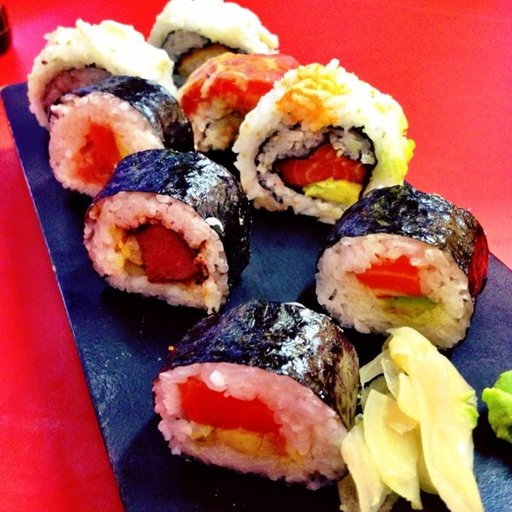

In [49]:
print(f"image class is {imgclass}")
img=Image.open(randomimg)
img

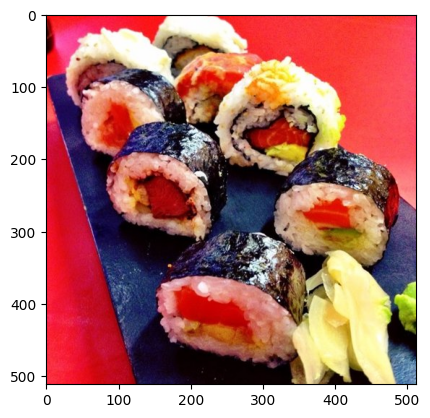

In [50]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(img)


In [54]:
np.asarray(img).shape

(512, 512, 3)

array([[[252,  19,  15],
        [250,  21,  16],
        [249,  26,  19],
        ...,
        [251,  56,  96],
        [249,  54,  98],
        [255,  61, 105]],

       [[251,  22,  19],
        [250,  22,  19],
        [245,  26,  20],
        ...,
        [252,  57,  97],
        [249,  54,  96],
        [255,  61, 105]],

       [[246,  22,  20],
        [243,  24,  20],
        [239,  24,  19],
        ...,
        [253,  58,  98],
        [249,  54,  96],
        [255,  61, 103]],

       ...,

       [[253,  47,  70],
        [255,  51,  74],
        [255,  49,  72],
        ...,
        [110, 151, 183],
        [108, 149, 179],
        [ 91, 132, 160]],

       [[245,  39,  62],
        [244,  38,  61],
        [248,  42,  65],
        ...,
        [103, 144, 176],
        [100, 141, 169],
        [113, 157, 182]],

       [[248,  42,  65],
        [243,  37,  60],
        [251,  45,  68],
        ...,
        [126, 167, 197],
        [ 99, 143, 170],
        [114, 158, 183]]], dtype=uint8)
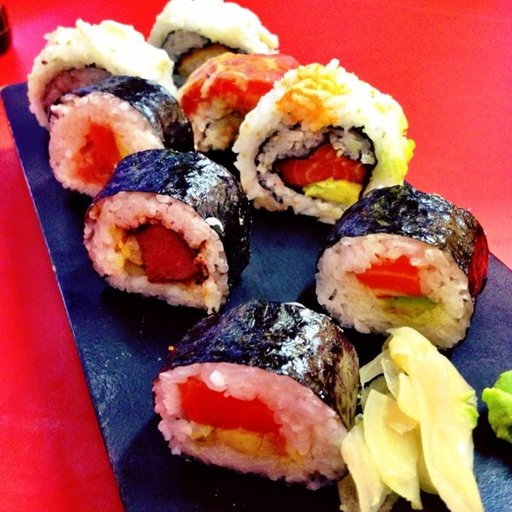

In [55]:
np.asarray(img)

In [57]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [58]:
transformer= transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [61]:
t=transformer(img)
t.dtype

torch.float32

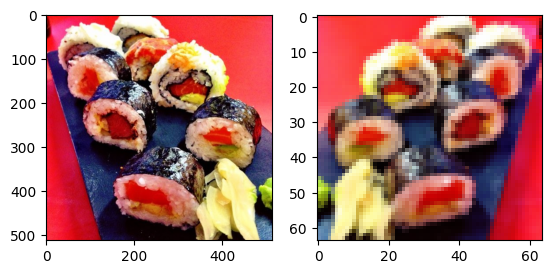

In [70]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img)
ax2.imshow(transformer(img).permute(1,2,0))

In [72]:
traindata= datasets.ImageFolder( root=traindir, transform= transformer, target_transform= None)
testdata= datasets.ImageFolder( root=testdir, transform= transformer, target_transform= None)

traindata, testdata

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pss/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pss/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [76]:
classes=traindata.classes
classes

['pizza', 'steak', 'sushi']

In [75]:
classesidx=traindata.class_to_idx
classesidx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [83]:
classes[traindata[0][1]]

'pizza'

In [90]:
traindl=DataLoader(dataset=traindata, batch_size=5, num_workers=2, shuffle =False )
testdl=DataLoader(dataset=testdata, batch_size=5, num_workers=2, shuffle =False )


In [84]:
os.cpu_count()

2

In [91]:
len(traindl), len(testdl)

(45, 15)

In [96]:
x,y= traindata[0]
classes[y]

'pizza'

In [97]:
traintrans= transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=21),
    transforms.ToTensor()
])

testtrans= transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

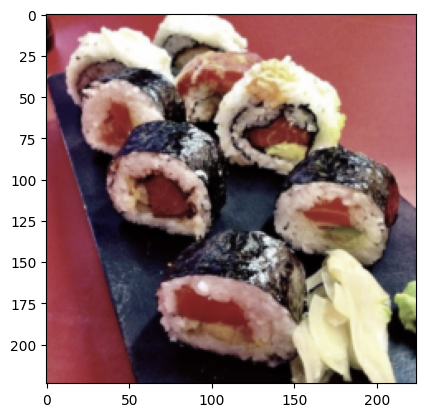

In [102]:
plt.imshow(traintrans(img).permute(1, 2, 0))

In [240]:
simpletransformer=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [241]:
simpletransformer2=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=21),
    transforms.ToTensor()
])

In [261]:
traindata= datasets.ImageFolder( root=traindir, transform= simpletransformer2)
testdata= datasets.ImageFolder( root=testdir, transform= simpletransformer)

traindl=DataLoader(dataset=traindata, batch_size=32, num_workers=os.cpu_count(), shuffle =True )
testdl=DataLoader(dataset=testdata, batch_size=32, num_workers=os.cpu_count(), shuffle =True )


In [262]:
#tiny VG architecture

class TinyVG(nn.Module):

  def __init__(self, ip , hl, op):
    super().__init__()

    self.conv1 = nn.Sequential(
            nn.Conv2d(ip, hl, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),

            nn.Conv2d(hl, hl, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

    self.conv2 = nn.Sequential(
            nn.Conv2d(hl, hl, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),

            nn.Conv2d(hl, hl, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

    self.conv3 = nn.Sequential(
            nn.Conv2d(hl, hl, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),

            nn.Conv2d(hl, hl, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

    self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4*4*hl,hl),
            nn.ReLU(),
            nn.Linear(hl,op)
        )

  def forward(self, x):
        x = self.conv1(x)

        x = self.conv2(x)
        x = self.conv3(x)
        x = self.classifier(x)
        return x



In [264]:
torch.manual_seed(42)
model=TinyVG(ip=3,hl=10,op=len(traindata.classes))
model

TinyVG(
  (conv1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=3, bias=True)
  )


In [245]:
images, labels= next(iter(traindl))

In [265]:
images.shape

torch.Size([32, 3, 64, 64])

In [266]:
model(images)

tensor([[ 0.3543,  0.3193, -0.1778],
        [ 0.3542,  0.3194, -0.1777],
        [ 0.3543,  0.3195, -0.1777],
        [ 0.3542,  0.3193, -0.1777],
        [ 0.3543,  0.3192, -0.1778],
        [ 0.3542,  0.3194, -0.1777],
        [ 0.3544,  0.3193, -0.1777],
        [ 0.3544,  0.3195, -0.1777],
        [ 0.3543,  0.3194, -0.1777],
        [ 0.3543,  0.3194, -0.1777],
        [ 0.3544,  0.3195, -0.1777],
        [ 0.3543,  0.3193, -0.1777],
        [ 0.3542,  0.3196, -0.1776],
        [ 0.3541,  0.3194, -0.1776],
        [ 0.3542,  0.3193, -0.1777],
        [ 0.3542,  0.3194, -0.1776],
        [ 0.3542,  0.3193, -0.1777],
        [ 0.3542,  0.3193, -0.1776],
        [ 0.3544,  0.3194, -0.1776],
        [ 0.3542,  0.3194, -0.1777],
        [ 0.3545,  0.3195, -0.1778],
        [ 0.3543,  0.3193, -0.1778],
        [ 0.3543,  0.3194, -0.1777],
        [ 0.3543,  0.3195, -0.1777],
        [ 0.3544,  0.3194, -0.1778],
        [ 0.3542,  0.3194, -0.1777],
        [ 0.3543,  0.3194, -0.1777],
 

In [159]:
!pip install torchinfo

In [129]:
from torchinfo import summary


In [248]:
summary(model,input_size=(1,3,64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVG                                   [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [249]:
opt= torch.optim.Adam(params=model.parameters(),lr=0.01)
lossfn=nn.CrossEntropyLoss()

In [250]:
def training(model, dataloader, lossfn, optimizer):
  model.train()
  totalloss=0
  for x, y in dataloader:
        optimizer.zero_grad()
        ypred = model(x)
        loss = lossfn(ypred, y)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
  return totalloss / len(dataloader)

In [251]:
def testing(model, dataloader, lossfn):
  model.eval()
  totalloss=0
  correct=0

  with torch.inference_mode():
        for x, y in dataloader:
            ypred = model(x)
            loss = lossfn(ypred, y)
            totalloss += loss.item()
            preds = ypred.argmax(dim=1)
            correct += (preds == y).sum().item()
  return totalloss / len(dataloader), correct / len(testdl.dataset)

In [267]:
torch.manual_seed(42)
from tqdm import tqdm

epochs = 20

for i in tqdm(range(epochs)):
    trainloss= training(model, traindl, lossfn, opt)
    testloss, testacc= testing(model, testdl, lossfn)
    print(trainloss,testloss,testacc)



  5%|▌         | 1/20 [00:01<00:27,  1.45s/it]

1.0971717089414597 1.1829559008280437 0.3333333333333333


 10%|█         | 2/20 [00:03<00:31,  1.74s/it]

1.0971795469522476 1.160413106282552 0.3333333333333333


 15%|█▌        | 3/20 [00:04<00:28,  1.67s/it]

1.1615953892469406 1.169613003730774 0.3333333333333333


 20%|██        | 4/20 [00:06<00:25,  1.57s/it]

1.0971758142113686 1.1597179969151814 0.3333333333333333


 25%|██▌       | 5/20 [00:07<00:22,  1.50s/it]

1.1013995558023453 1.1703014373779297 0.3333333333333333


 30%|███       | 6/20 [00:09<00:20,  1.43s/it]

1.1616071313619614 1.169602592786153 0.3333333333333333


 35%|███▌      | 7/20 [00:10<00:18,  1.41s/it]

1.1615814417600632 1.161109447479248 0.3333333333333333


 40%|████      | 8/20 [00:11<00:16,  1.37s/it]

1.0971918925642967 1.1709927717844646 0.3333333333333333


 45%|████▌     | 9/20 [00:13<00:15,  1.37s/it]

1.1616068631410599 1.1914594968159993 0.3333333333333333


 50%|█████     | 10/20 [00:14<00:14,  1.45s/it]

1.0971754491329193 1.1597237984339397 0.3333333333333333


 55%|█████▌    | 11/20 [00:16<00:14,  1.60s/it]

1.1615839451551437 1.1611087719599407 0.3333333333333333


 60%|██████    | 12/20 [00:18<00:12,  1.53s/it]

1.097175620496273 1.1815751791000366 0.3333333333333333


 65%|██████▌   | 13/20 [00:19<00:10,  1.49s/it]

1.097177229821682 1.180180589358012 0.3333333333333333


 70%|███████   | 14/20 [00:20<00:08,  1.48s/it]

1.0971902534365654 1.1392626365025837 0.3333333333333333


 75%|███████▌  | 15/20 [00:22<00:07,  1.45s/it]

1.1014012768864632 1.1491423447926838 0.3333333333333333


 80%|████████  | 16/20 [00:23<00:05,  1.42s/it]

1.0971811935305595 1.1604119936625164 0.3333333333333333


 85%|████████▌ | 17/20 [00:25<00:04,  1.41s/it]

1.097173273563385 1.1716856956481934 0.3333333333333333


 90%|█████████ | 18/20 [00:26<00:02,  1.46s/it]

1.1615872085094452 1.149143934249878 0.3333333333333333


 95%|█████████▌| 19/20 [00:28<00:01,  1.63s/it]

1.09717907756567 1.1829539934794109 0.3333333333333333


100%|██████████| 20/20 [00:29<00:00,  1.50s/it]

1.0971769765019417 1.1399447917938232 0.3333333333333333


In [260]:
print(trainloss,testloss,testacc)

1.0841435566544533 1.0981016556421916 0.3333333333333333
